In [1]:
import random
import numpy as np
import pandas as pd
import scipy
import scipy.io as sio
import os
import matplotlib.pyplot as plt
from scipy import signal
import time

In [2]:
plt.rcParams["figure.dpi"]

100.0

In [3]:
# scipy.__version__
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.dpi"] = 150

In [6]:
plot_dir = 'plots'
os.makedirs(plot_dir, exist_ok=True)
root_dir = os.path.join('..', 'Datasets', 'SignFi')

In [7]:
print(scipy.io.whosmat(os.path.join(root_dir, 'dataset_lab_150.mat')))
print(scipy.io.whosmat(os.path.join(root_dir, 'dataset_lab_276_ul.mat')))
print(scipy.io.whosmat(os.path.join(root_dir, 'dataset_lab_276_dl.mat')))
print(scipy.io.whosmat(os.path.join(root_dir, 'dataset_home_276.mat')))

[('label', (7500, 1), 'double'), ('csi1', (200, 30, 3, 1500), 'double'), ('csi2', (200, 30, 3, 1500), 'double'), ('csi3', (200, 30, 3, 1500), 'double'), ('csi4', (200, 30, 3, 1500), 'double'), ('csi5', (200, 30, 3, 1500), 'double')]
[('csiu_lab', (200, 30, 3, 5520), 'double'), ('label_lab', (5520, 1), 'double')]
[('csid_lab', (200, 30, 3, 5520), 'double'), ('label_lab', (5520, 1), 'double')]
[('csid_home', (200, 30, 3, 2760), 'double'), ('csiu_home', (200, 30, 3, 2760), 'double'), ('label_home', (2760, 1), 'double')]


In [8]:
# data_lab_150 = sio.loadmat(os.path.join(root_dir, 'dataset_lab_150.mat'))
data_lab_276_ul = sio.loadmat(os.path.join(root_dir, 'dataset_lab_276_ul.mat'))
data_lab_276_dl = sio.loadmat(os.path.join(root_dir, 'dataset_lab_276_dl.mat'))

In [9]:
data_lab_276_ul['csiu_lab'].shape
# (time frame, subcarrriers, antennas, samples)

(200, 30, 3, 5520)

In [8]:
csi = data_lab_276_ul['csiu_lab'].T
csi_angle = np.angle(csi)
csi_amp = np.abs(csi)

csi_tensor = np.concatenate([csi_amp, csi_angle], axis=0)

In [9]:
(data_lab_276_ul['label_lab'] == data_lab_276_dl['label_lab']).all()

True

In [10]:
csi_label = data_lab_276_ul['label_lab'].astype('int16').squeeze()
csi_label.shape, csi_label

((5520,), array([  1,   2,   3, ..., 274, 275, 276], dtype=int16))

In [11]:
csi_label

array([  1,   2,   3, ..., 274, 275, 276], dtype=int16)

In [11]:
# get unwrapped signal
csi_to_use = csi_amp
csi_unwrapped = np.unwrap(csi_to_use, axis=-1)

In [12]:
f1, f2 = 2, 80
fir_coefs = signal.firwin(8, [f1, f2], pass_zero=False, fs=1000)
csi_filt = signal.filtfilt(fir_coefs, 1.0, csi_unwrapped, axis=-1)
fir_coefs

array([0.01322698, 0.05744119, 0.17581378, 0.28537384, 0.28537384,
       0.17581378, 0.05744119, 0.01322698])

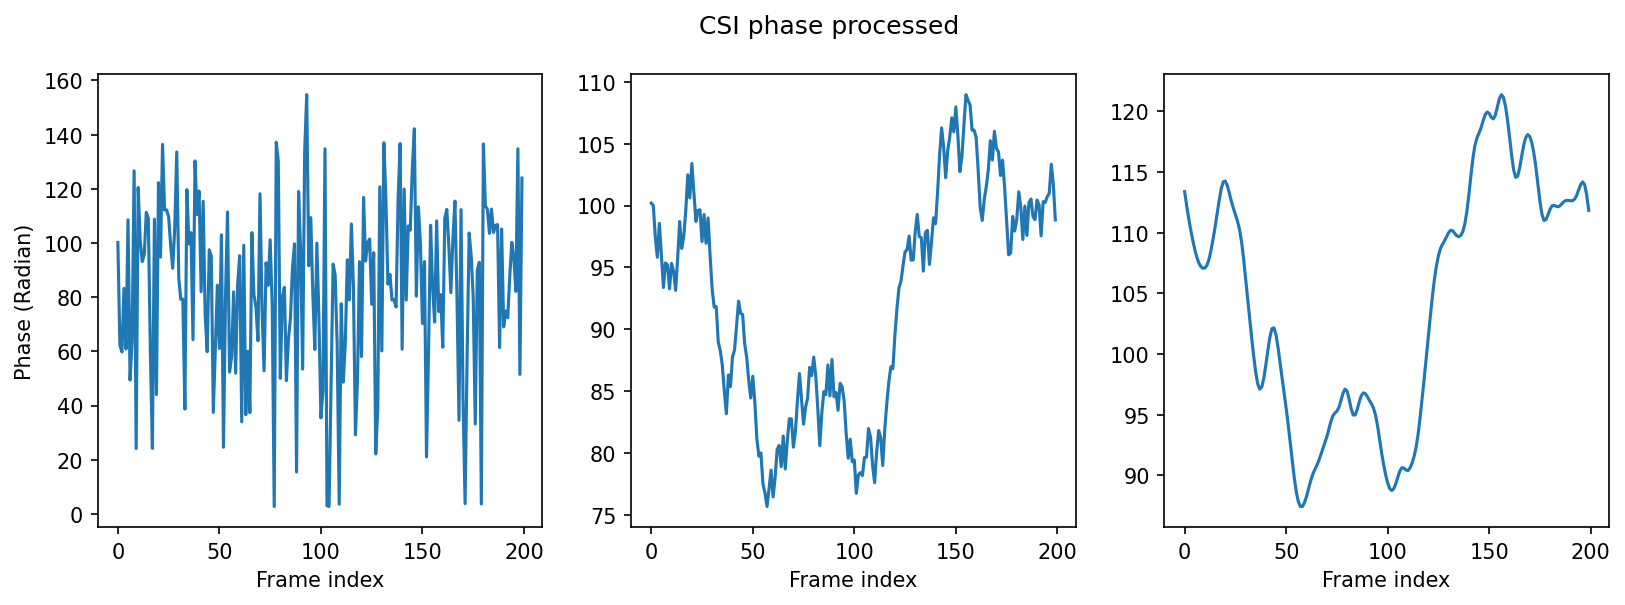

In [16]:
# plot Raw csi phase, unwrapped an processed
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches((13, 4))

id_sample = 0
id_antenna = 1
id_carrier = 5

ax1.plot(csi_amp[id_sample, id_antenna, id_carrier])
ax2.plot(csi_unwrapped[id_sample, id_antenna, id_carrier])
ax3.plot(csi_filt[id_sample, id_antenna, id_carrier])

ax1.set_xlabel('Frame index')
ax2.set_xlabel('Frame index')
ax3.set_xlabel('Frame index')
ax1.set_ylabel('Phase (Radian)')
# plt.tight_layout()
fig.suptitle('CSI phase processed')
plt.show()
# plt.savefig(os.path.join(plot_dir, 'CSI Phase Processed'))

11


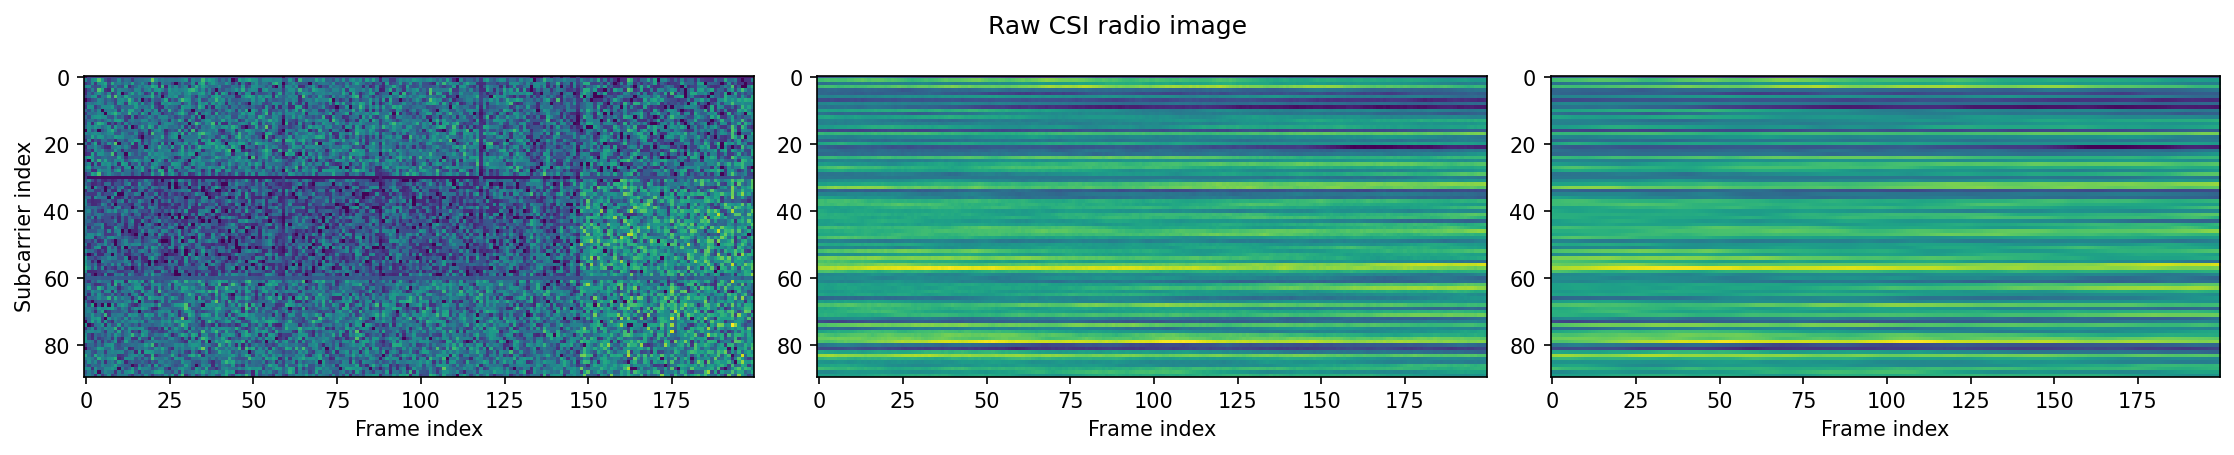

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches((15, 3))
id_sample = random.randint(0, csi_angle.shape[0])
id_sample = 11
print(id_sample)
ax1.imshow(csi_to_use[id_sample].reshape(90, -1))
ax2.imshow(csi_unwrapped[id_sample].reshape(90, -1))
ax3.imshow(csi_filt[id_sample].reshape(90, -1))

ax1.set_xlabel('Frame index')
ax2.set_xlabel('Frame index')
ax3.set_xlabel('Frame index')
ax1.set_ylabel('Subcarrier index')
plt.tight_layout()
fig.suptitle('Raw CSI radio image')
plt.show()
# plt.savefig(os.path.join(plot_dir, 'Raw CSI radio image'))

In [20]:
def plot_radio_image(csi, title):
    plt.imshow(csi)
    plt.xlabel('Frame index')
    plt.ylabel('Subcarrier index')
    # plt.tight_layout()
    plt.title(f'{title} CSI Radio Image')
    plt.savefig(os.path.join(plot_dir, f'radio_{title}'))


sample_id = 0

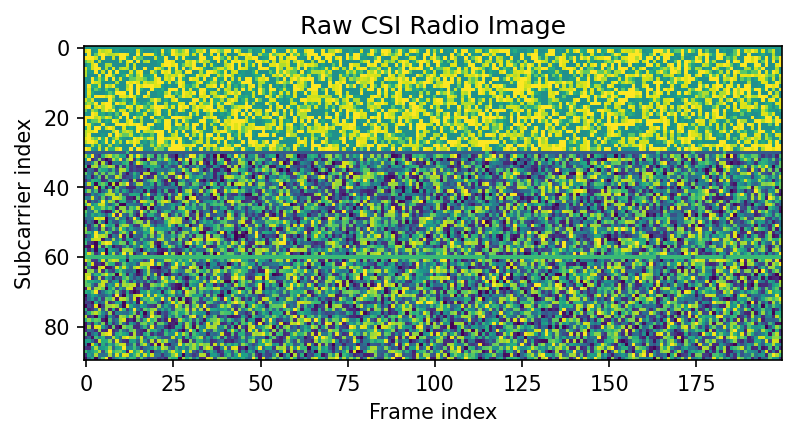

In [21]:
plot_radio_image(csi_angle[sample_id].reshape(90, -1), 'Raw')

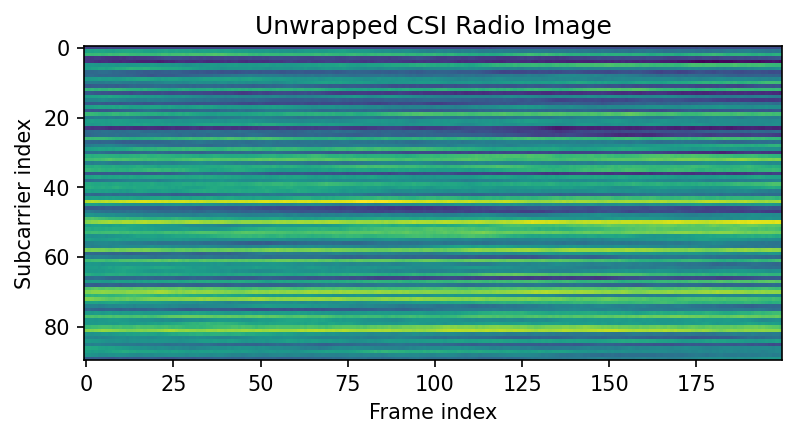

In [22]:
plot_radio_image(csi_unwrapped[sample_id].reshape(90, -1), 'Unwrapped')

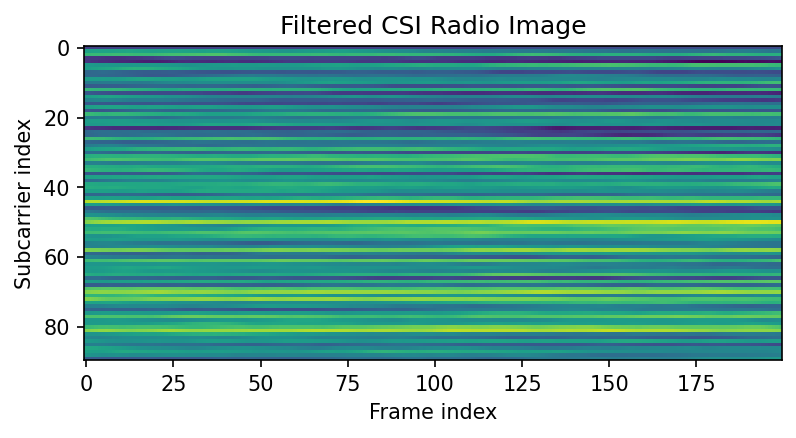

In [23]:
plot_radio_image(csi_filt[sample_id].reshape(90, -1), 'Filtered')

In [24]:
def plot_phase_image(csi, title):
    plt.plot(csi)
    plt.xlabel('Frame index')
    plt.ylabel('Phase (radian)')
    plt.tight_layout()
    plt.title(f'{title} CSI Phase')
    plt.savefig(os.path.join(plot_dir, f'phase_{title}'))

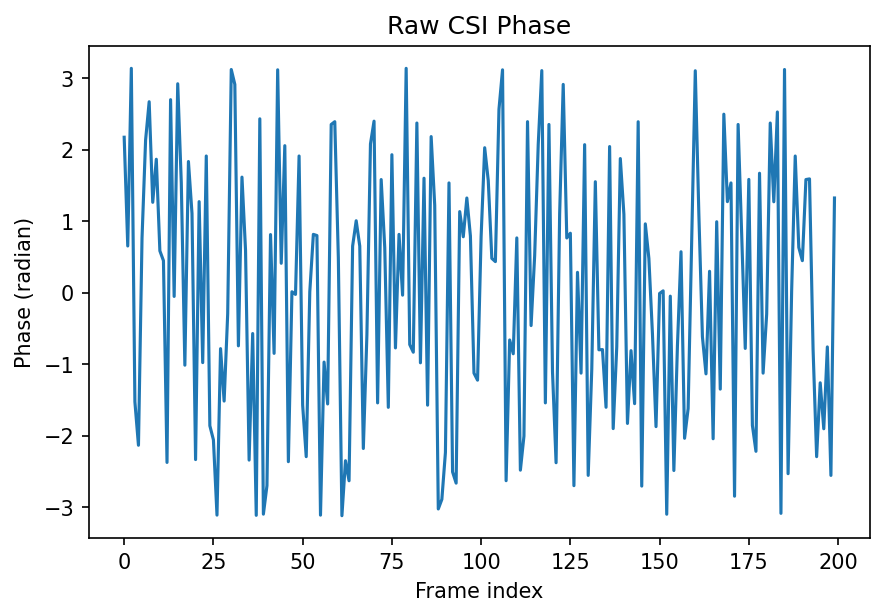

In [17]:
plot_phase_image(csi_angle[sample_id, 1, 1], 'Raw')

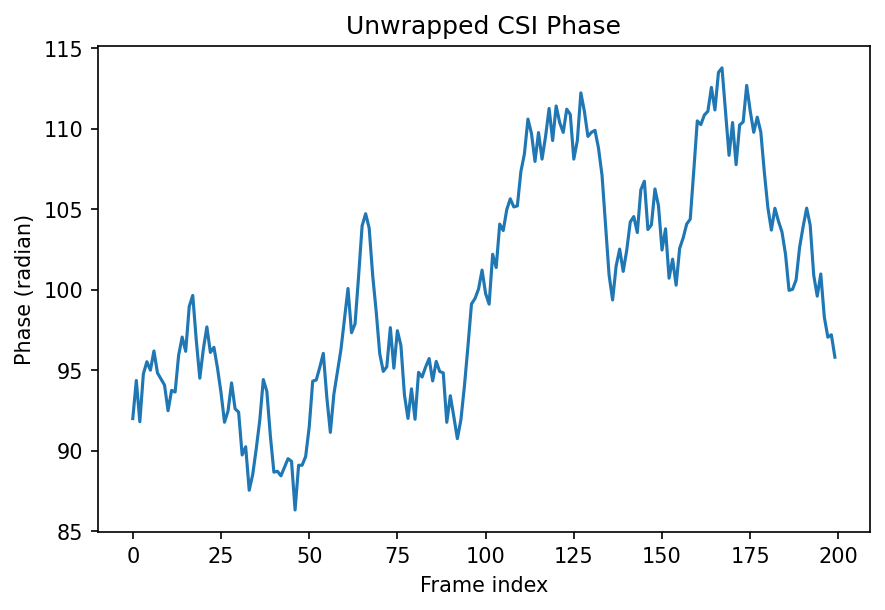

In [18]:
plot_phase_image(csi_unwrapped[sample_id, 1, 1], 'Unwrapped')

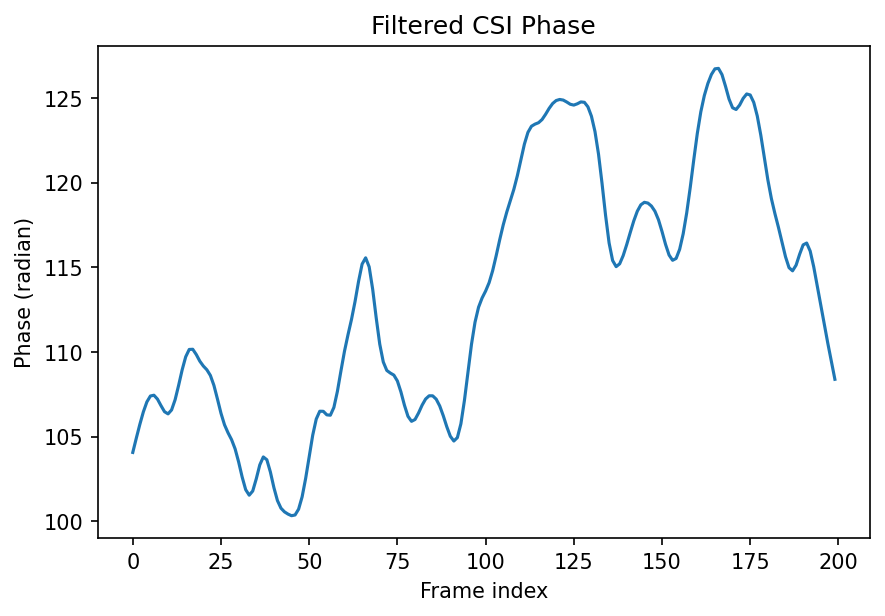

In [19]:
plot_phase_image(csi_filt[sample_id, 1, 1], 'Filtered')

# Test preprocessing CSI ratio

In [6]:
# divide data of two atennas
csi_d = csi[:, :, 2, :10] / csi[:, :, 1, :10]
csi_d[0, 0, :10]

NameError: name 'csi' is not defined

In [7]:
csi_dangle = np.angle(csi_d)
plt.imshow(csi_dangle[:, :, 0].T)
plt.show()

NameError: name 'csi_d' is not defined

In [8]:
plt.imshow(csi_angle[:, :, 1, 0].T)
plt.show()


NameError: name 'csi_angle' is not defined

# Convert to dfs

In [8]:
from preprocessing.signfi_csi_dfs import process_rx_sample

In [15]:
csi_sample = csi[0]
csi_sample.shape

(3, 30, 200)

(200, 30, 3)
(121, 200)


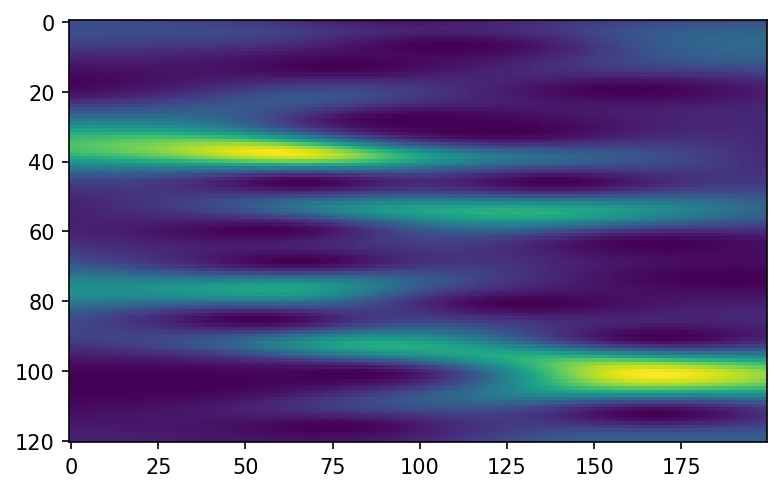

In [21]:
print(csi_sample.T.shape)
dfs1 = process_rx_sample(csi_sample.T)
print(dfs1.shape)
plt.imshow(dfs1)
plt.show()

(30, 200, 3)
(121, 200)


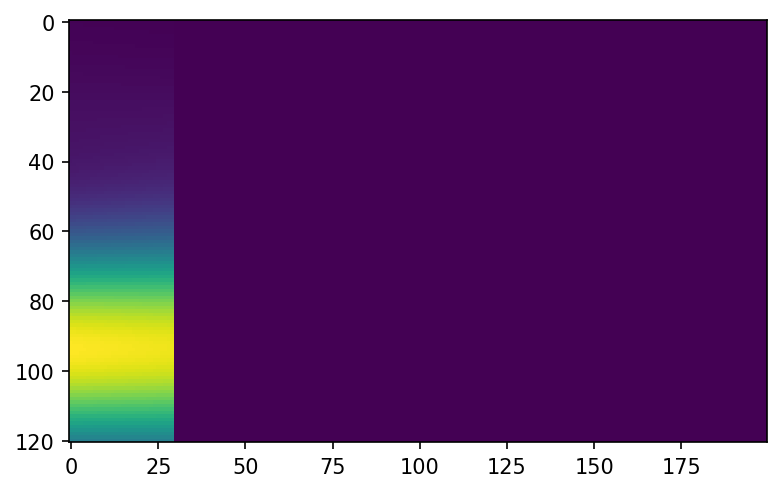

In [23]:
csi_sample2 = np.transpose(csi_sample, [1, 2, 0])
print(csi_sample2.shape)
dfs1 = process_rx_sample(csi_sample2)
print(dfs1.shape)
plt.imshow(dfs1)
plt.show()

# Load in preprocessed data

In [10]:
path_data = os.path.join(root_dir, 'processed', 'dataset_lab_276_ul.npz')
data = np.load(path_data)
csi_data = data['csiu_lab']
data.close()

In [11]:
csi_data.shape

(5520, 3, 30, 200)

# Preprocessed data to dfs

In [10]:
path_data = os.path.join(root_dir, 'dfs', 'dataset_lab_276_ul.npz')
data = np.load(path_data, allow_pickle=True)
path_labels = os.path.join(root_dir, 'dataset_lab_276_ul.mat')
sign_labels = sio.loadmat(path_labels, variable_names=['label_lab'])
sign_labels = sign_labels['label_lab']

In [8]:
csi = data['csiu_lab']

In [9]:
csi.shape

(5520, 121, 200)

In [11]:
sign_labels

array([[  1],
       [  2],
       [  3],
       ...,
       [274],
       [275],
       [276]], dtype=uint16)

In [12]:
unq, idx = np.unique(sign_labels, return_counts=True)
unq, idx

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [13]:
unq.shape

(276,)

In [24]:
def plot_dfs(csi_data, title):
    plt.imshow(csi_data)
    plt.title(title)
    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, title.lower().replace(' ', '_').replace('"', '')))

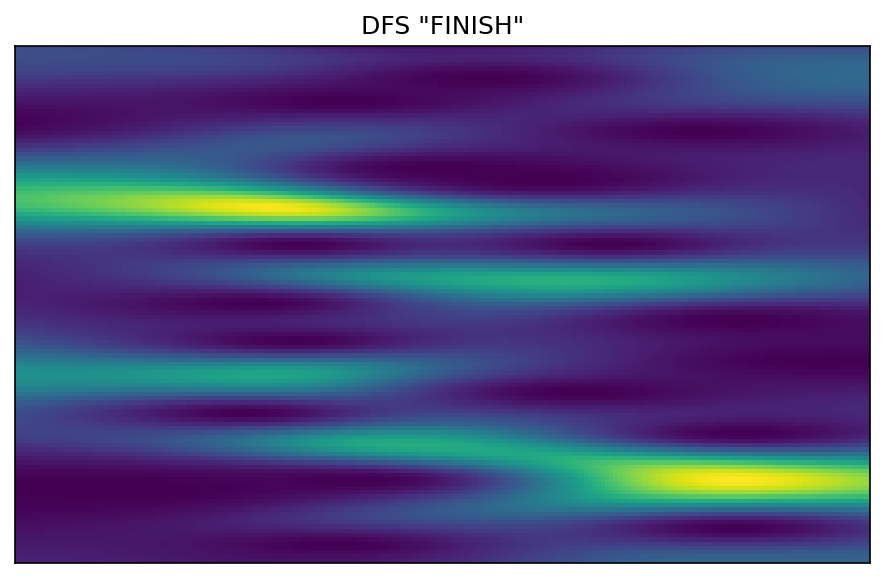

In [25]:
plot_dfs(csi[0], 'DFS "FINISH"')

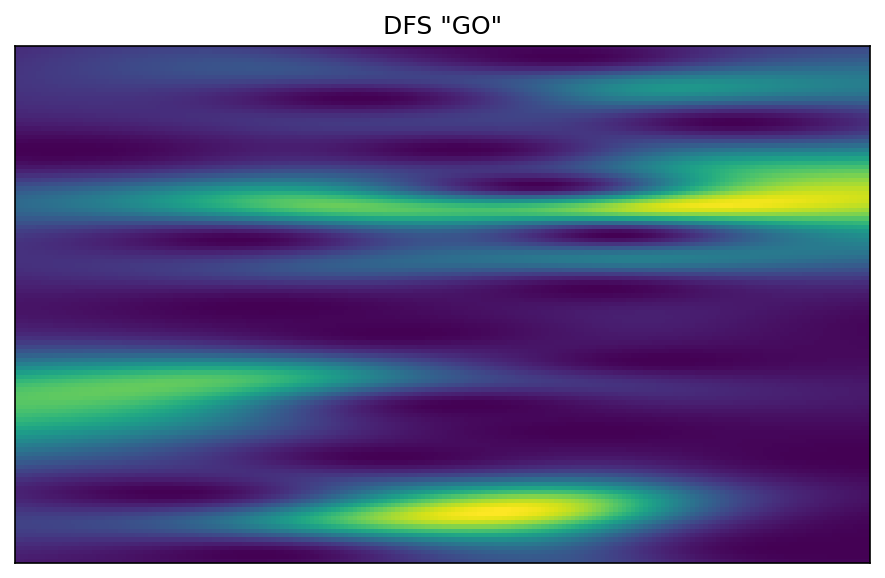

In [27]:
plot_dfs(csi[1], 'DFS "GO"')

# Preprocess gaf

In [21]:
from pyts.image import GramianAngularField

In [169]:
csi_amp.shape
csi_angle.shape

(5520, 3, 30, 200)

In [170]:
# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
gaf_sum_amp = gasf.fit_transform(csi_amp[0][0])
gaf_sum_angl = gasf.fit_transform(csi_angle[0][0])

In [171]:
gadf = GramianAngularField(method='difference')
gaf_dif_amp = gadf.fit_transform(csi_amp[0][0])
gaf_dif_angl = gadf.fit_transform(csi_angle[0][0])

In [172]:
gaf_sum_amp.shape

(30, 200, 200)

[]

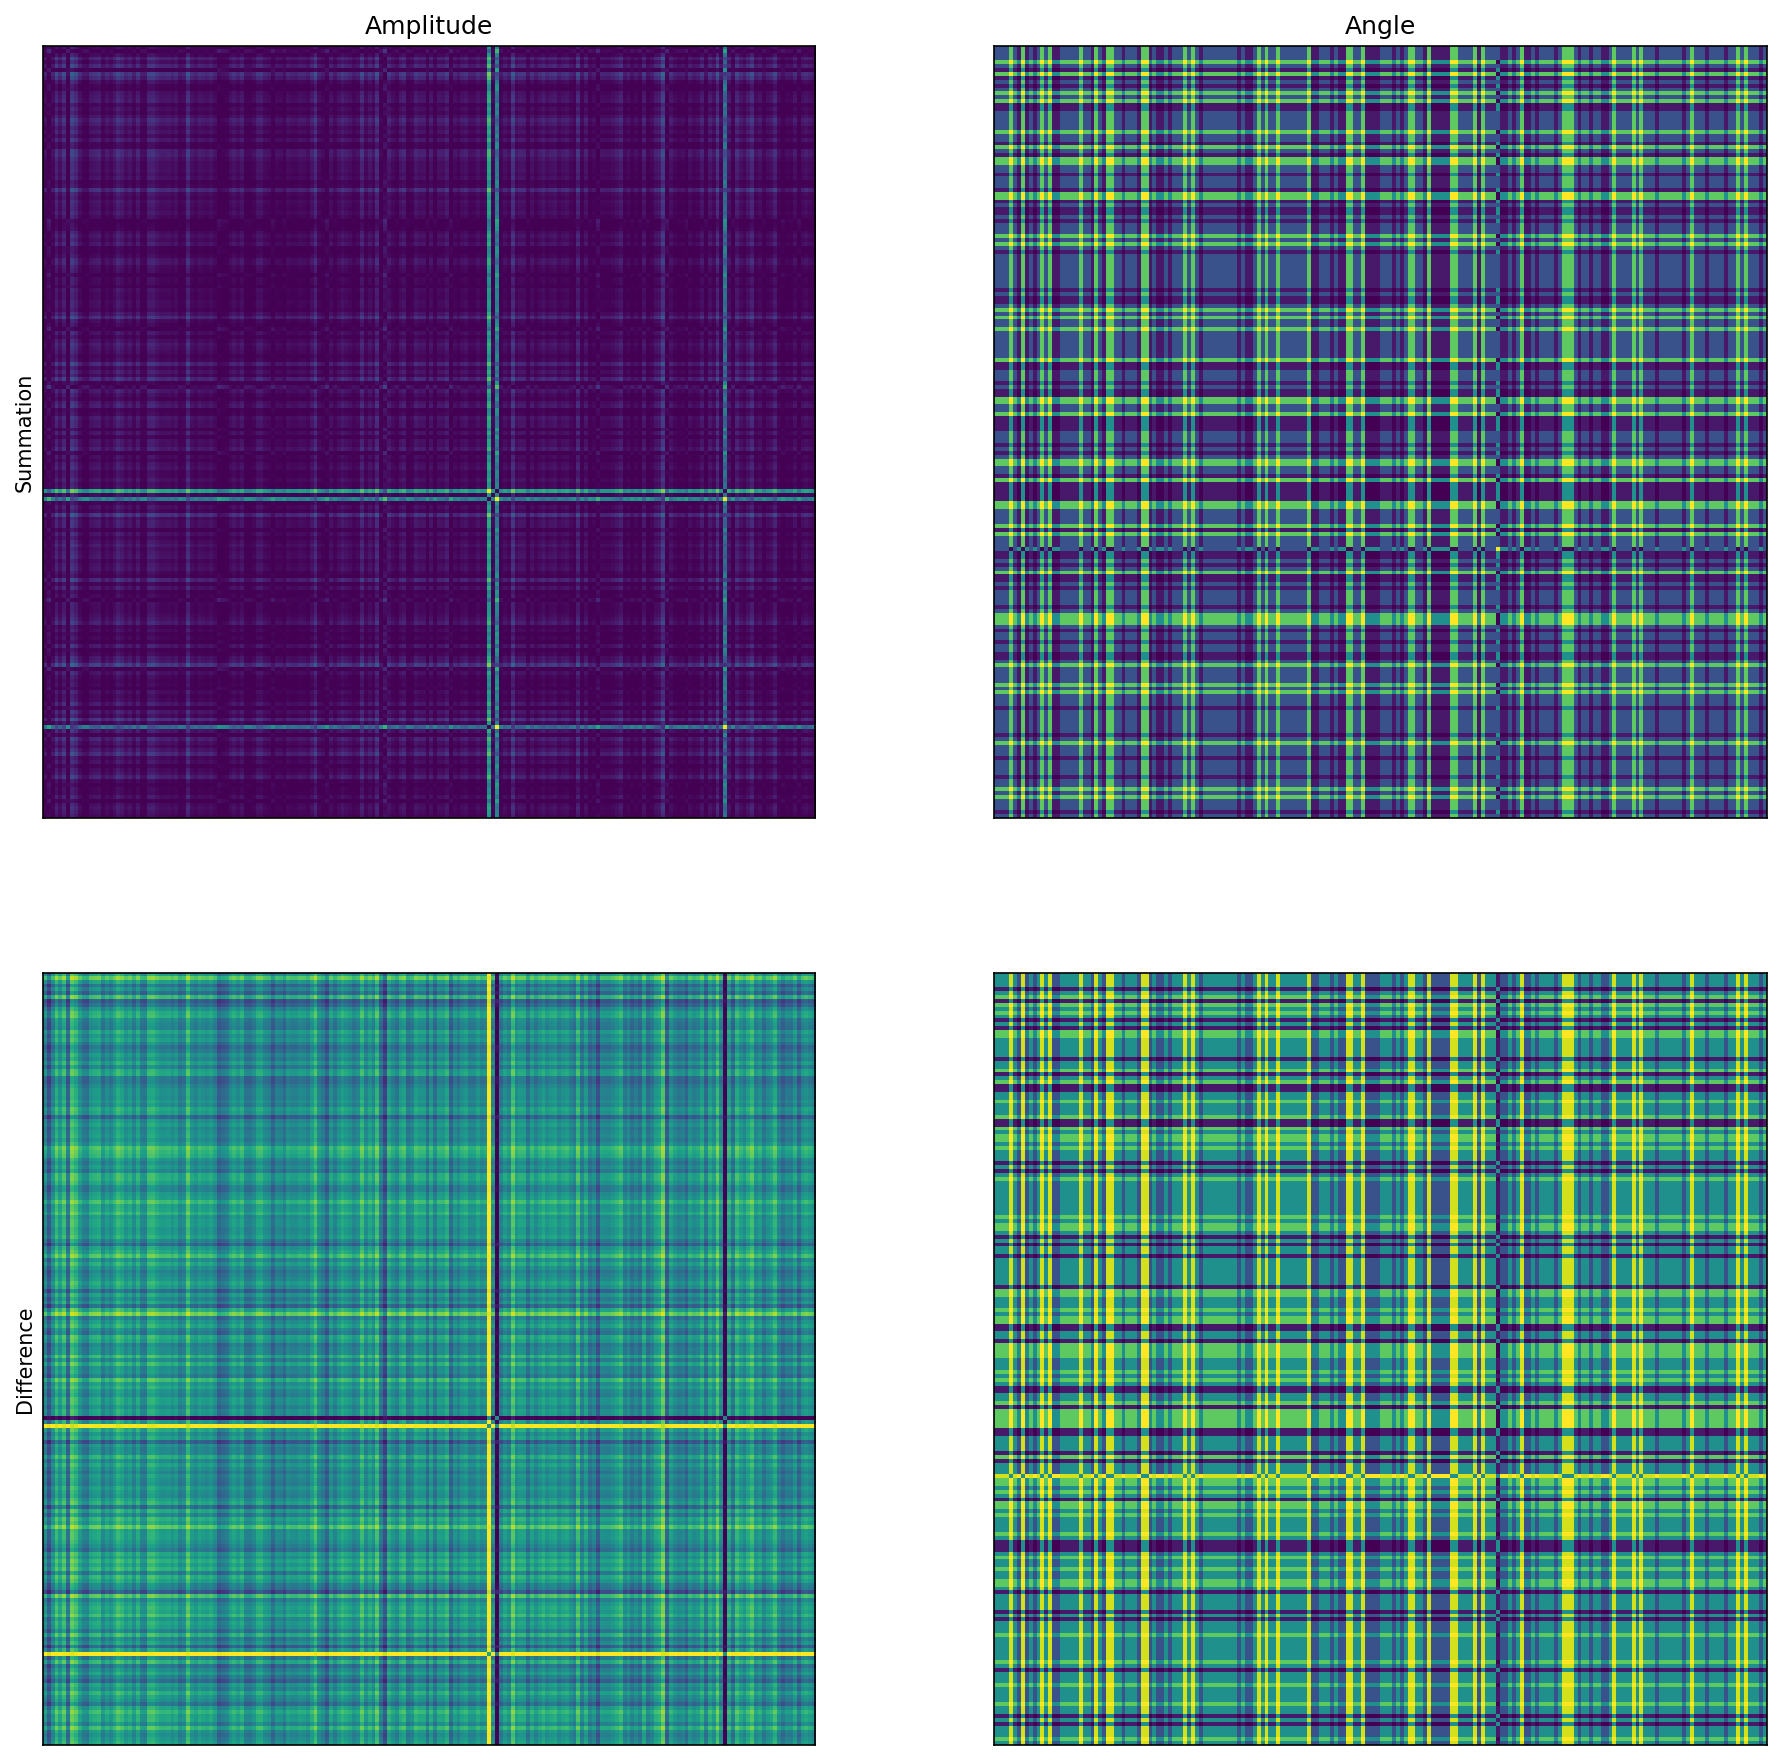

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        axs[i][j].tick_params(left=False,
                              bottom=False,
                              labelleft=False,
                              labelbottom=False)
axs[0][0].imshow(gaf_sum_amp[0])
axs[0][1].imshow(gaf_sum_angl[0])
axs[1][0].imshow(gaf_dif_amp[0])
axs[1][1].imshow(gaf_dif_angl[0])
axs[0][0].set_ylabel('Summation')
axs[1][0].set_ylabel('Difference')
axs[0][0].set_title('Amplitude')
axs[0][1].set_title('Angle')
plt.savefig('plots/GAF_options')
# plt.tight_layout()
plt.plot()

In [186]:
def plot_gaf(gaf, title):
    plt.tick_params(left=False, bottom=False,
                    labelleft=False,
                    labelbottom=False)
    plt.imshow(gaf)
    plt.title(title)
    # plt.margins(0.015, tight=True)
    # plt.subplots_adjust(left = 0.1, top = 0.9, right = 0.9, bottom = 0.1, hspace = 0.5, wspace = 0)

    # plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, title.lower().replace(' ', '_')), bbox_inches='tight')


sample_id = 15

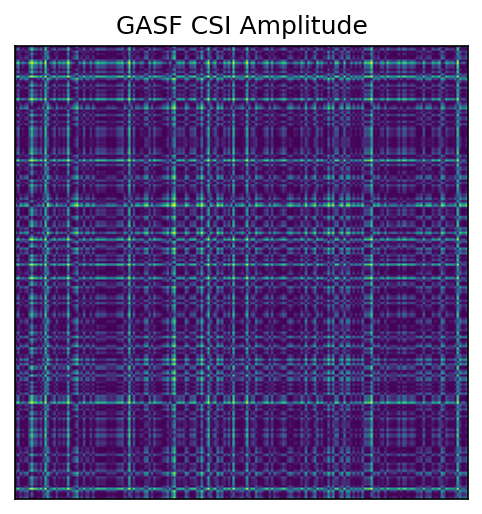

In [187]:
plot_gaf(gaf_sum_amp[sample_id], 'GASF CSI Amplitude')

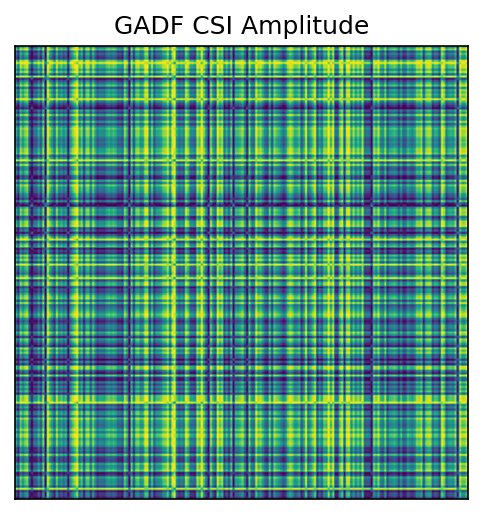

In [188]:
plot_gaf(gaf_dif_amp[sample_id], 'GADF CSI Amplitude')

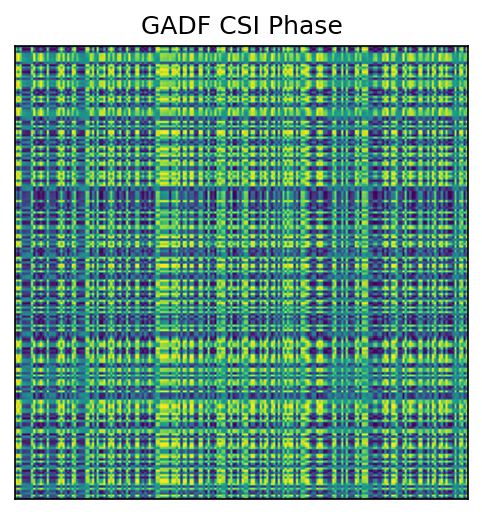

In [189]:
plot_gaf(gaf_dif_angl[sample_id], 'GADF CSI Phase')

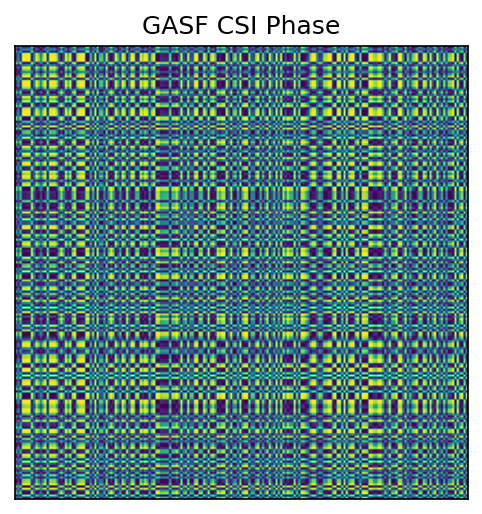

In [190]:
plot_gaf(gaf_sum_angl[sample_id], 'GASF CSI Phase')

In [ ]:
# time method
gasf = GramianAngularField(method='summation')
start = time.time()
for _ in range(1000):
    X_gasf = gasf.fit_transform(csi_angle[0][0])
print('time:', time.time() - start)

In [ ]:
a = csi_angle.shape + (csi_angle.shape[-1],)

In [ ]:
# # Compute Gramian angular fields
# shape_gaf = csi_angle.shape + (csi_angle.shape[-1], )
# csi_gaf = np.empty(shape_gaf)
#
# gadf = GramianAngularField(method='difference')


In [ ]:
def compute_gaf_from_csi(csi_data):
    shape_gaf = csi_data.shape + (csi_data.shape[-1],)
    csi_gaf = np.empty(shape_gaf)

    csi_angle = np.angle(csi_data)
    gadf = GramianAngularField(method='difference')

    for antenna_idx in range(csi_angle.shape[0]):
        gaf = gadf.fit_transform(csi_angle[antenna_idx])
        csi_gaf[antenna_idx] = gaf
    return csi_gaf

In [ ]:
csi_sample = csi[0]
csi_gaf = compute_gaf_from_csi(csi_sample)

In [ ]:
csi_gaf.shape

In [ ]:
csi_gaf = csi_gaf.reshape(-1, *csi_gaf.shape[-2:])
csi_gaf.shape

In [ ]:
plt.imshow(csi_gaf[0])

In [ ]:
shape_gaf = csi.shape + (csi.shape[-1],)
csi_gaf = np.empty(shape_gaf)


In [ ]:
csi_angle = np.angle(csi_data)
gadf = GramianAngularField(method='difference')

for sample_idx in range(csi_angle.shape[0]):
    for antenna_idx in range(csi_angle.shape[1]):
        csi_gaf[sample_idx][antenna_idx] = gadf.fit_transform(csi_angle[sample_idx][antenna_idx])

In [ ]:
import h5py
import tables as tb

In [ ]:
path_hdf5 = '../data/SignFi/gaf/dataset_lab_276_ul.h5'

with tb.File(path_hdf5) as h5f:
    print(h5f.list_nodes(h5f.root))
    # domain_labels = h5f.get_node('/domain_labels').read()
    # print(domain_labels.shape)
    # task_labels = h5f.get_node('/task_labels').read()
    # print(task_labels.shape)
    # print(type(task_labels))

# Cross environment

In [6]:
data_lab_150 = sio.loadmat(os.path.join(root_dir, 'dataset_lab_150.mat'))

In [8]:
print(scipy.io.whosmat(os.path.join(root_dir, 'dataset_lab_150.mat')))

[('label', (7500, 1), 'double'), ('csi1', (200, 30, 3, 1500), 'double'), ('csi2', (200, 30, 3, 1500), 'double'), ('csi3', (200, 30, 3, 1500), 'double'), ('csi4', (200, 30, 3, 1500), 'double'), ('csi5', (200, 30, 3, 1500), 'double')]


In [12]:
all_labels = data_lab_150['label']
all_labels.shape

(7500, 1)

In [15]:
np.unique(all_labels)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278], dtype=uint16)

In [17]:
all_labels-1

array([[  0],
       [  1],
       [  2],
       ...,
       [275],
       [276],
       [277]], dtype=uint16)

In [18]:
np.max(all_labels)

278